# Sales prediction using python:

# Importing modules:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Exploratory data anaysis:

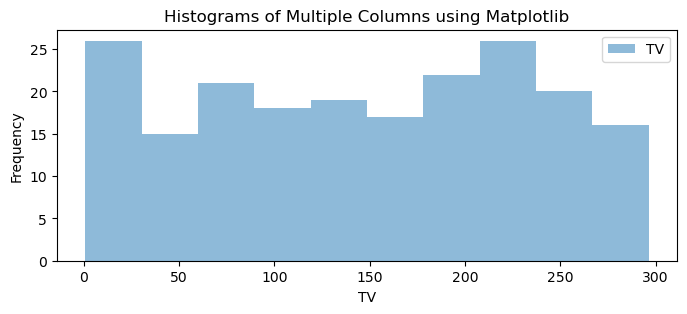

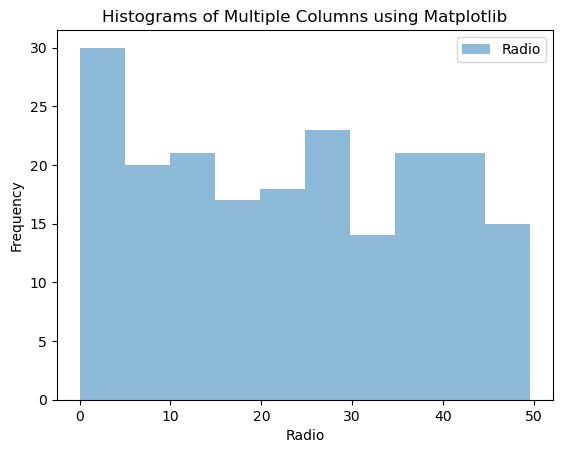

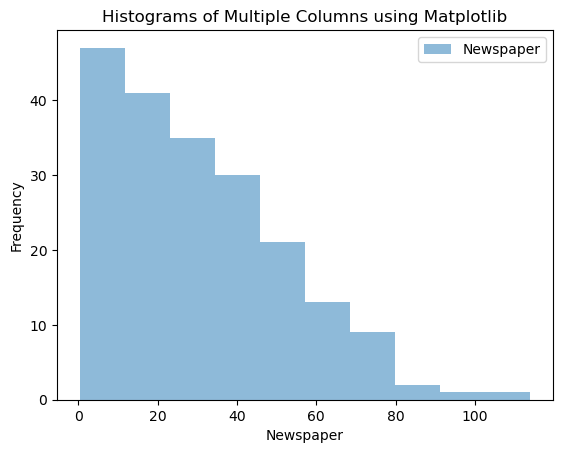

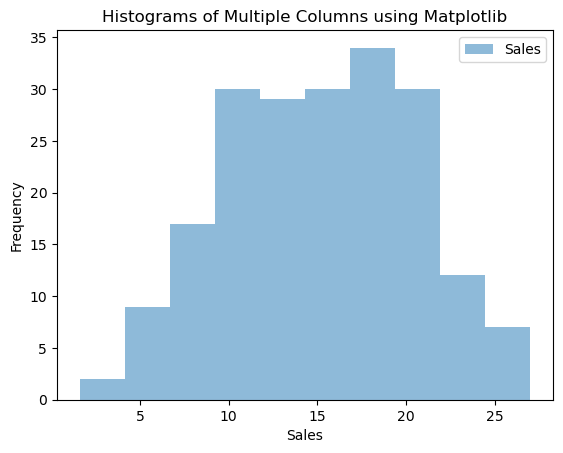

In [6]:
plt.figure(figsize=(8,3))
for column in df.columns:
    plt.hist(df[column], bins=10, alpha=0.5, label=column)
    plt.title('Histograms of Multiple Columns using Matplotlib')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

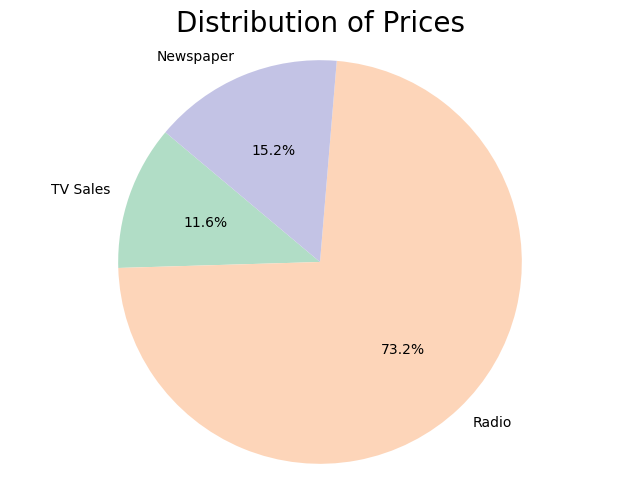

In [7]:
tv_sales_values = df['Radio']
count_values =df['TV']
newspaper = df['Newspaper']

# Create a pie chart
plt.figure(figsize=(8, 6))

# Combine the values for the pie chart
combined_values = [sum(tv_sales_values), sum(count_values),sum(newspaper)]
categories = ['TV Sales', 'Radio','Newspaper']

plt.pie(combined_values, labels=categories, autopct='%1.1f%%', startangle=140,colors = ['#B1DDC6', '#FDD5B9', '#C3C3E5', '#F4CAE4']
)
plt.title('Distribution of Prices', loc = 'center',size = 20)
plt.subplots_adjust(top=0.85)
plt.axis('equal')
plt.show()


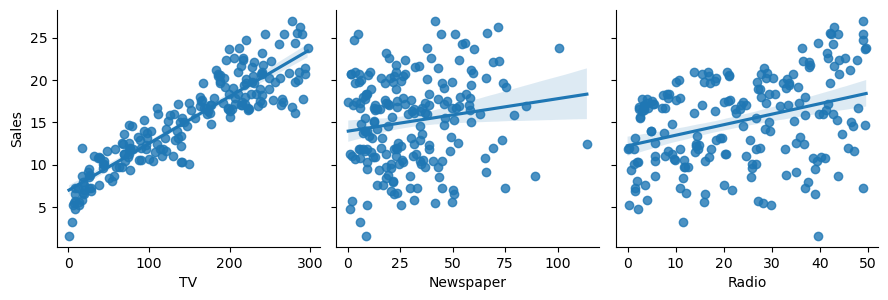

In [8]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=3,  kind='reg')
plt.show()


# Model building:

In [9]:
x = df.drop(columns=['Sales'])
y = df['Sales']

In [10]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [11]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [12]:
#Funnction for model Training:

from sklearn.model_selection import train_test_split
#classify funtion which is defined by us to cheack the accuracy
def function_model(model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    print("Accuracy: ",model.score(x_test,y_test))        

In [13]:
#Linear Regression Model

from sklearn.linear_model import LinearRegression
model=LinearRegression()
function_model(model)

Accuracy:  0.9115647723992757


In [14]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [15]:
testdat=x.iloc[150:,:]

In [16]:
model.predict(testdat)

array([21.40779104, 12.12822036, 17.88150523, 18.21228932, 17.11095629,
        6.09147928, 14.40908701, 12.92836006,  9.22565677, 13.77606971,
       15.96404812, 13.13831936, 16.82802417, 17.46713823, 12.58090014,
       17.78492754,  9.63019994, 16.4474296 , 18.89730805, 21.24042066,
        8.59480345, 15.8336908 ,  7.84869225, 14.55779863, 17.10206692,
       24.94755122, 21.38770686, 14.73822063, 19.94432942, 14.71726516,
       13.43232243, 17.10853074,  8.30485298, 24.90888356, 20.73265903,
       20.61884334, 12.45394152, 18.10675693, 21.68517626,  6.94582943,
       11.1754297 ,  9.89340771,  6.01090333, 18.20194019, 16.58691507,
        7.10548951, 10.28094143, 15.25928683, 24.58221952, 18.18512048])